# Computational Physics

In [31]:
import numpy as np
import pandas as pd
import pylab
import random

import matplotlib.pyplot as plt
from matplotlib import animation, rc
%matplotlib inline

from IPython.display import Image, HTML

# Dricet Sampling vs. Markov Sampling


Direct sampling: Keep track of the trials and hits.
*Weak law of large numbers
*One should not stop a stochastic calculation because the result looks good, nor continue because the result is not what we think it should be.
    
Both approaches try to sample a probability distribution $\pi(\vec{x})$ (transition probability).
Both approaches evaluate an observable (a function) $O(\vec{x})$.
For the following examples, $O(\vec{x})$ is $1$ inside the circle, $0$ otherwise.

We evaluate,
$$
\frac{N_{hits}}{N} = \frac{1}{N} \sum_{i=1}^{N} O_i \approx < O > =
\frac{\int^{1}_{-1}\int^{1}_{-1} dx dy \, \pi(x,y) O(x,y)}{\int^{1}_{-1}\int^{1}_{-1} dx dy \, \pi(x,y)}
$$

What defines MC is that the probability distribution is not evaluated, as inside the integral, but sampled!

The whole difference relies on the fact that via direct sampling one knows about $\pi$, while for markov chains one gets $\pi$ after so many iterations.

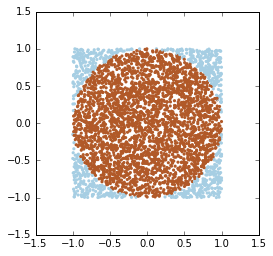

Number of hits =  3139
Pi =  3.139


In [32]:
N=4000
radius=1.0
X = np.random.uniform(low=-radius, high=radius, size=N)  # Random numbers from -1 to 1
Y = np.random.uniform(low=-radius, high=radius, size=N)   

# calculate the distance from the center 
R = np.sqrt(X**2+Y**2);  

box_area =(2.0*radius)**2       
is_point_inside = R<radius
N_hits=np.sum(is_point_inside)
circle_area = box_area*N_hits/N

plt.figure(figsize=(4,4))  
plt.scatter(X,Y, c=is_point_inside, s=10.0, edgecolors='none', cmap=plt.cm.Paired)  
plt.axis('equal')
plt.show();

print ("Number of hits = ", N_hits)
print("Pi = ", 4.0*N_hits/N)

In [33]:
"""
PROCEDURE direct_pi
N_hits  <- 0 (initialize)
for i=1, N
    x <- ran(-1,1)
    y <- ran(-1,1)
    if (x**2 + y**2 < 1) 
         N_hits = N_hits + 1
return N_hits
""";

In [34]:
def direct_pi(N=4000, r=1.0):
    X = np.random.uniform(low=-radius, high=radius, size=N)  # Random numbers from -1 to 1
    Y = np.random.uniform(low=-radius, high=radius, size=N)   

    # calculate the distance from the center 
    R = np.sqrt(X**2+Y**2);  

    box_area =(2.0*radius)**2      # This is the big box 
    is_point_inside = R<radius
    N_hits=np.sum(is_point_inside)
    circle_area = box_area*N_hits/N

    return N_hits

trials = 5
pi_estimates = np.zeros(trials)
for i in range(trials):
    pi_estimates[i] = direct_pi()
# This ext line works because N=4000 by default, otherwise 4.0*pi_estimates/N
results = {'Hits':pi_estimates, 'Estimates':pi_estimates/1000.0}
df = pd.DataFrame(results)
df

,Estimates,Hits
0,3.156,3156
1,3.124,3124
2,3.148,3148
3,3.128,3128
4,3.091,3091


In [35]:
""" worry about the correlation time!
PROCEDURE markov_pi
N_hits <- 0
x, y <- 1, 1
for i=1, N
    dx <- ran(-d, d)
    dy <- ran(-d, d)
    if (abs(x + dx)<1 and abs(y+dy)<1)
        x <- x+dx
        y <- y+dy
    if (x**2 + y**2 < 1)
        N_hits <- N_hits + 1
return N_hits
""";

In [36]:
def markov_pi(N=4000, radius=1.0, delta=1.0e-1):
    N_hits = 0
    X, Y   = 1.0, 1.0
    dx = np.random.uniform(low=-delta, high=delta, size=N)
    dy = np.random.uniform(low=-delta, high=delta, size=N)   

    for i in range(N):
        if (abs(X+dx[i])<radius and abs(Y+dy[i])<radius):
            X += dx[i]
            Y += dy[i]
        if (X**2 + Y**2 <radius):
            N_hits += 1
    return N_hits

trials = 5
pi_estimates = np.zeros(trials)
for i in range(trials):
    pi_estimates[i] = markov_pi()
# This ext line works because N=4000 by default, otherwise 4.0*pi_estimates/N
results = {'Hits':pi_estimates, 'Estimates':pi_estimates/1000.0}
df = pd.DataFrame(results)
df

,Estimates,Hits
0,3.001,3001
1,3.243,3243
2,3.432,3432
3,3.068,3068
4,3.194,3194


In [37]:
def markov_pi_mod(N=4000, radius=1.0, accuracy=2):
    N_hits     = 0
    X, Y       = 1.0, 1.0
    delta      = 1.0e-1
    trials     = 0
    acceptance = 0
    approval   = 0.0

    while (round(approval,accuracy)!=0.5 and trials<30):
        dx = random.uniform(-delta, delta)
        dy = random.uniform(-delta, delta)
        if (abs(X+dx)<radius and abs(Y+dy)<radius):
            X += dx
            Y += dy
        if (X**2 + Y**2 <radius):
                acceptance += 1
        trials  += 1
        approval = float(acceptance)/trials

        if (round(approval,accuracy)<=0.5):
            delta *= (1+delta)
        else:
            delta *= (1-delta)

        print(approval)
    for i in range(N):
        dx = random.uniform(-delta, delta)
        dy = random.uniform(-delta, delta)
        if (abs(X+dx)<radius and abs(Y+dy)<radius):
            X += dx
            Y += dy
        if (X**2 + Y**2 <radius):
                N_hits += 1

    return N_hits, approval
a,b = markov_pi_mod()
print(a,b)

'''
trials = 5
pi_estimates = np.zeros(trials)
rates        = np.zeros(trials)
for i in range(trials):
    pi_estimates[i], rates[i] = direct_pi()
# This ext line works because N=4000 by default, otherwise 4.0*pi_estimates/N
results = {'Hits':pi_estimates, 'Estimates':pi_estimates/1000.0, 'rate': rates}
df = pd.DataFrame(results)
df
''';

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.18181818181818182
0.25
0.3076923076923077
0.35714285714285715
0.4
0.4375
0.47058823529411764
0.5
4000 0.5


# Detailed Balance

Our algorithm (yet to be found) must generate the configurations $a$, $b$, and $c$ with prescribed probabilities $\pi(a)$, $\pi(b)$, and $\pi(c)$, respectively, which we require to be equal.
So we want to describe the configuration probabilities $\pi$ with the aid of our MC algorithm, which is nothing but a set of transition probabilities $p(a \rightarrow b)$.

In [38]:
"""
6 | 7 | 8                       2nd
----------                       |
3 | 4 | 5                 3rd ---.---1st
----------                       |
0 | 1 | 2                       4th
""";

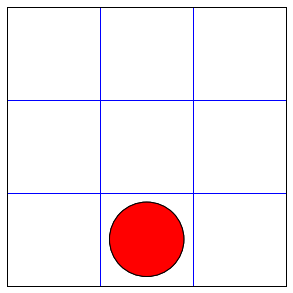

In [39]:
from IPython.display import HTML

sigma = 0.4  # sigma and s_map are needed for the graphical output
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0),
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0),
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
site=8
patch = plt.Circle(s_map[site], radius=sigma, fc='r')

plt.plot([0.5, 3.5], [1.5, 1.5], 'b')
plt.plot([0.5, 3.5], [2.5, 2.5], 'b')
plt.plot([1.5, 1.5], [0.5, 3.5], 'b')
plt.plot([2.5, 2.5], [0.5, 3.5], 'b')
plt.axis('scaled')
plt.axis([0.5, 3.5, 0.5, 3.5])
plt.xticks([])
plt.yticks([])
    
def init():
    ax.add_patch(patch)
    return patch,

def animate(i):
    site = neighbor[s_map.index(patch.center)][ random.randint(0, 3)]
    patch.center = s_map[site]
    return patch,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=500, blit=True)

HTML(anim.to_html5_video());

**Detailed Balance**:

$$ p(a \rightarrow a) + p(a \rightarrow b) + p(a \rightarrow c) =1 $$ 
             
$$ \pi(a) = \pi(a) p(a \rightarrow a) + \pi(b) p(b \rightarrow a) + \pi(c) p(c \rightarrow a) $$

$$\Rightarrow \pi(a) p(a \rightarrow b ) + \pi(a) p(a \rightarrow c ) =
\pi(c) p(c \rightarrow a) \pi(b) p(b \rightarrow a)$$ 

In [40]:
rc('animation', html='html5')
anim

**Transfer Matrix**:
$$
P = \begin{bmatrix}
    p(1\rightarrow 1) & p(2\rightarrow 1) & p(3\rightarrow 1) & \dots  \\
    p(1\rightarrow 2) & p(2\rightarrow 2) & p(3\rightarrow 2) & \dots  \\
    \vdots & \vdots & \vdots & \ddots \\
\end{bmatrix}
$$
$$ \pi^{i=0}(9) = 1$$
$$ \pi^{i+1}(a) = \sum_{b=1}^{9} \pi^i(b)p(b\rightarrow a) $$

In [41]:
"""
6 | 7 | 8                       2nd
----------                       |
3 | 4 | 5                 3rd ---.---1st
----------                       |
0 | 1 | 2                       4th
""";
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

#transfer_matrix
transfer = np.zeros((9, 9))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25
print("P = \n", transfer, "\n")

position = np.zeros(9)
position[8] = 1.0

N        = 100
timestep = ''
position_x = np.zeros(N)
x          = 0
for t in range(N):
    if t<10: timestep= '0'+str(t)
    else: timestep=str(t)
    print (timestep,'  ',["%0.5f" % i for i in position])
    position_x[t] = position[x]
    
    # update
    position = np.dot(transfer, position)

P = 
 [[ 0.5   0.25  0.    0.25  0.    0.    0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.    0.25  0.    0.    0.    0.  ]
 [ 0.    0.25  0.5   0.    0.    0.25  0.    0.    0.  ]
 [ 0.25  0.    0.    0.25  0.25  0.    0.25  0.    0.  ]
 [ 0.    0.25  0.    0.25  0.    0.25  0.    0.25  0.  ]
 [ 0.    0.    0.25  0.    0.25  0.25  0.    0.    0.25]
 [ 0.    0.    0.    0.25  0.    0.    0.5   0.25  0.  ]
 [ 0.    0.    0.    0.    0.25  0.    0.25  0.25  0.25]
 [ 0.    0.    0.    0.    0.    0.25  0.    0.25  0.5 ]] 

00    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '1.00000']
01    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.25000', '0.00000', '0.25000', '0.50000']
02    ['0.00000', '0.00000', '0.06250', '0.00000', '0.12500', '0.18750', '0.06250', '0.18750', '0.37500']
03    ['0.00000', '0.04688', '0.07812', '0.04688', '0.09375', '0.18750', '0.07812', '0.18750', '0.28125']
04    ['0.02344', '0.05469', '0.09766', '0.05469', '0.

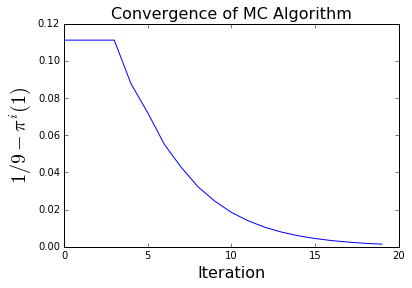

In [42]:
plt.title("Convergence of MC Algorithm", fontsize=16)
plt.ylabel(r"$1/9 - \pi^i (1)$", fontsize=20)
plt.xlabel("Iteration", fontsize=16)
plt.plot(range(20),(1./9)-position_x[:20])
plt.show();

$$ P\pi^{i}_{e} = \lambda\pi^{i}_{e}$$

$$ \pi = \sum_{k=1}^{9} \alpha_k \pi_{e}^{k} $$

$$ P^i \pi = \sum_{k=1}^{9} \alpha_k (\lambda_k)^i \pi_{e}^{k}$$

In [43]:
eigenval, eigenvec = np.linalg.eigh(transfer)

print(eigenval)
print(eigenvec)

[ -5.00000000e-01  -6.80853512e-17   2.94119155e-16   2.50000000e-01
   2.50000000e-01   5.00000000e-01   7.50000000e-01   7.50000000e-01
   1.00000000e+00]
[[ -1.66666667e-01   4.01456700e-01  -7.41564889e-02  -3.16841013e-02
   -3.31824093e-01  -5.00000000e-01   5.43051051e-01  -1.96032877e-01
   -3.33333333e-01]
 [  3.33333333e-01  -3.27300211e-01   4.75613189e-01  -4.81894089e-01
    2.13438198e-01  -2.29343435e-16   1.73509087e-01  -3.69541964e-01
   -3.33333333e-01]
 [ -1.66666667e-01  -7.41564889e-02  -4.01456700e-01  -3.16841013e-02
   -3.31824093e-01   5.00000000e-01  -1.96032877e-01  -5.43051051e-01
   -3.33333333e-01]
 [  3.33333333e-01  -4.75613189e-01  -3.27300211e-01   5.13578190e-01
    1.18385895e-01   3.45633261e-17   3.69541964e-01   1.73509087e-01
   -3.33333333e-01]
 [ -6.66666667e-01   2.22044605e-16   1.94289029e-16   6.33682025e-02
    6.63648186e-01  -3.33066907e-16   2.77555756e-17  -2.77555756e-16
   -3.33333333e-01]
 [  3.33333333e-01   4.75613189e-01   3.273

In [44]:
from scipy.optimize import curve_fit


firstnonzero = 4 # look at the transfer matrix procedure

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(position_x[firstnonzero],N,N-firstnonzero)

popt, pcov = curve_fit(func, x, (1./9)-position_x[firstnonzero:])

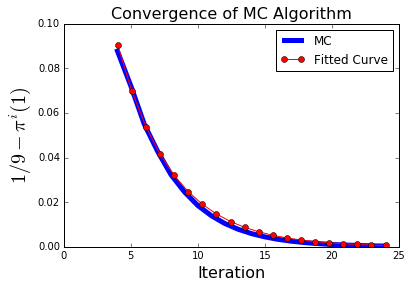

	a 		 b 		 c 
 0.0908625844509 0.245853062544 -7.70146145789e-05


In [45]:
plt.figure()
plt.title("Convergence of MC Algorithm", fontsize=16)
plt.ylabel(r"$1/9 - \pi^i (1)$", fontsize=20)
plt.xlabel("Iteration", fontsize=16)

plt.plot(range(firstnonzero,25),(1./9)-position_x[firstnonzero:25], label="MC", linewidth=5)
plt.plot(x[:20]+firstnonzero, func(x[:20], *popt), 'r-', label="Fitted Curve", marker='o')
plt.legend()
plt.show();
print("\ta \t\t b \t\t c \n",*popt)

# Metropolis (Arianna W. Rosenbluth, Marshall N. Rosenbluth, Edward Teller)

a on a hilltop and b on a valley -> arbitrary probabilities!

$$ p(a \rightarrow b) = min\left[ 1, \frac{\pi(b)}{\pi(a)} \right]$$

$$ \exp\left(-\beta \Delta E \right) = \exp\left( -\beta (E_b - E_a) \right) 
= \left\{ \begin{array}{ll}
         \geq 1 & \mbox{if $E_a \geq E_b$};\\
        <1 & \mbox{if $E_a < E_b$}.\end{array} \right. 
$$

Let's denote the apriori probability distribution for an MC move by $\mathcal{A}(i \rightarrow j)$.

Furthermore, $\mathcal{P}(i\rightarrow j)$ be the probability of moving from $i$ to $j$, and $p(i\rightarrow j)$ be the probability of acceptance.

$$ \mathcal{P}(a\rightarrow b) = \mathcal{A}(a\rightarrow b) p(a\rightarrow b)  $$


Previously, detailed balance was described as,
$$ \pi(a) p(a\rightarrow b) = \pi(b)p(b\rightarrow a). $$


So now the acceptance probability (Metropolis-Hastings algorithm) is given by,
$$
\frac{p(a\rightarrow b)}{p(b\rightarrow a)} = 
\frac{\pi(b)}{\pi(a)} \frac{\mathcal{A}(b\rightarrow a)}{\mathcal{A}(a\rightarrow b)}
$$

$$
p(a\rightarrow b) = 
min\left[ 1, \frac{\pi(b)}{\pi(a)} \frac{\mathcal{A}(b\rightarrow a)}{\mathcal{A}(a\rightarrow b)} \right]
$$

In [46]:
# TO-DO
# Histogram for the probability at different times


# equilibirum prbability value -> eigenvector (\lambda=1)
# Global balance requires Irreducibility and aperiodicity.

In [47]:
histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
weight = [3.0, 0.5, 1.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0]
pos = 8
n_iter = 1000000
for iter in range(n_iter):
    new_pos = neighbor[pos][random.randint(0, 3)]
    if random.random() < weight[new_pos] / weight[pos]: # metropolis-hastings
        pos = new_pos
    histo[pos] += 1

norm = sum(weight)
print( 'comparison:  weight,     histogram' )
for k in range(9):
    print( 'site: ', k,' weight: ', weight[k], ' histo: ', norm * histo[k] / float(n_iter) )


comparison:  weight,     histogram
site:  0  weight:  3.0  histo:  3.0006
site:  1  weight:  0.5  histo:  0.49561
site:  2  weight:  1.0  histo:  0.98363
site:  3  weight:  0.5  histo:  0.50452
site:  4  weight:  1.0  histo:  1.00345
site:  5  weight:  0.5  histo:  0.49875
site:  6  weight:  2.0  histo:  2.019
site:  7  weight:  0.5  histo:  0.50218
site:  8  weight:  1.0  histo:  0.99226


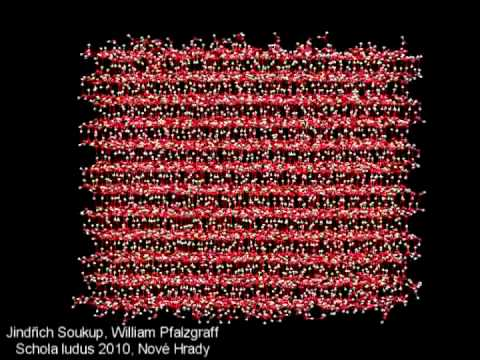

In [51]:
from IPython.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(hours=0, minutes=1, seconds=15).total_seconds())

YouTubeVideo("6s0b_keOiOU", start=start, autoplay=0, theme="light", color="red")
#YouTubeVideo("NQhjAtCKghE")

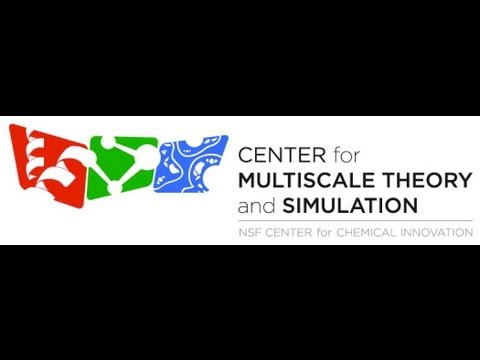

In [52]:
start=int(timedelta(hours=0, minutes=41, seconds=15).total_seconds())

YouTubeVideo("w2-B54lbYjA", start=start, autoplay=0, theme="light", color="red")

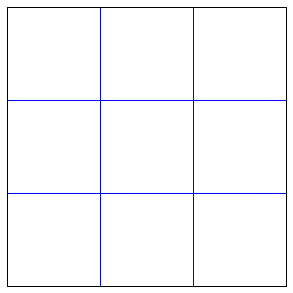

In [50]:
sigma = 0.4  # sigma and s_map are needed for the graphical output
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0),
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0),
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
site=8
patch = plt.Circle(s_map[site], radius=sigma, fc='r')

plt.plot([0.5, 3.5], [1.5, 1.5], 'b')
plt.plot([0.5, 3.5], [2.5, 2.5], 'b')
plt.plot([1.5, 1.5], [0.5, 3.5], 'b')
plt.plot([2.5, 2.5], [0.5, 3.5], 'b')
plt.axis('scaled')
plt.axis([0.5, 3.5, 0.5, 3.5])
plt.xticks([])
plt.yticks([])
    
def init():
    ax.add_patch(patch)
    return patch,

def animate(i):
    site = neighbor[s_map.index(patch.center)][ random.randint(0, 3)]
    patch.center = s_map[site]
    return patch,

#anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=500, blit=True)
plt.show();

[1.0, 2.0, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 3.0]
[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]
[297807, 50049, 100574, 49943, 99884, 49438, 201806, 50603, 99896]


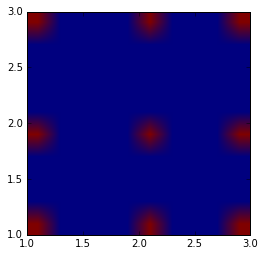

In [21]:
X = [0]*len(histo)
Y = [0]*len(histo)
for site in range(len(X)):
    X[site], Y[site] = s_map[site]
    
print(X)
print(Y)
print(histo)
heatmap, xedges, yedges = np.histogram2d(X, Y)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap, extent=extent)
plt.show();